# 🚀 Rwanda Export Opportunity Analysis - NISR Hackathon 2025

## Project Objective: Identify Rwanda's Next Big Export Opportunity

### Analysis Framework:
1. **Current Export Performance Analysis** - Understand existing strengths
2. **Market Trends & Patterns** - Identify growth opportunities  
3. **Commodity Deep Dive** - Analyze product performance by quarter
4. **Geographic Market Analysis** - Find emerging destinations
5. **Predictive Modeling** - Forecast future demand
6. **Opportunity Identification** - Recommend next big export sectors
7. **Policy Recommendations** - Strategic export promotion

### Key Questions to Answer:
- What are Rwanda's fastest-growing export commodities?
- Which markets show the highest growth potential?
- What seasonal patterns exist in Rwanda's exports?
- Which products have the best growth trajectory?
- What opportunities exist for youth and SME engagement?

In [2]:
# Import Required Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully!")
print(" Ready to analyze Rwanda's export opportunities!")

✅ Libraries imported successfully!
 Ready to analyze Rwanda's export opportunities!


## 1. Data Loading & Initial Exploration

Let's load all our cleaned datasets and explore the current export landscape.

In [3]:
# Load all analysis-ready datasets
datasets = {}

# Load export data
try:
    datasets['countries'] = pd.read_csv('2024Q3_ExportCountry.csv')
    print("✅ Export by Country data loaded")
except:
    print("❌ Export by Country data not found")

try:
    datasets['commodities'] = pd.read_csv('2024Q3_ExportsCommodity.csv')
    print("✅ Export Commodities data loaded")
except:
    print("❌ Export Commodities data not found")

try:
    datasets['reexports'] = pd.read_csv('2024Q3_ReexportsCommodity.csv')
    print("✅ Re-export Commodities data loaded")
except:
    print("❌ Re-export Commodities data not found")

try:
    datasets['regional'] = pd.read_csv('2024Q3_Regional blocks.csv')
    print("✅ Regional Blocks data loaded")
except:
    print("❌ Regional Blocks data not found")

try:
    datasets['continents'] = pd.read_csv('2024Q3_Trade by continents.csv')
    print("✅ Continental Trade data loaded")
except:
    print("❌ Continental Trade data not found")

try:
    datasets['total_trade'] = pd.read_csv('analysis_ready_total_trade_world_updated.csv')
    print("✅ Total Trade data loaded")
except:
    print("❌ Total Trade data not found")

print(f"\n📊 Successfully loaded {len(datasets)} datasets")
print("🎯 Ready to analyze Rwanda's export performance!")

❌ Export by Country data not found
❌ Export Commodities data not found
❌ Re-export Commodities data not found
❌ Regional Blocks data not found
❌ Continental Trade data not found
❌ Total Trade data not found

📊 Successfully loaded 0 datasets
🎯 Ready to analyze Rwanda's export performance!


In [4]:
# Quick overview of current export performance
if 'commodities' in datasets:
    print("🔍 RWANDA'S CURRENT EXPORT LANDSCAPE (Q3 2024)")
    print("=" * 60)
    
    # Get Q3 2024 commodity exports
    commodities_df = datasets['commodities'].copy()
    
    # Display current export composition
    print("\n📦 TOP EXPORT COMMODITIES (Q3 2024):")
    top_commodities = commodities_df.nlargest(5, '2024Q3')[['Commodity_Description', '2024Q3', 'Share_Percent_Q3']]
    for idx, row in top_commodities.iterrows():
        print(f"   {idx+1}. {row['Commodity_Description'][:50]}...")
        print(f"      Value: ${row['2024Q3']:.1f}M | Share: {row['Share_Percent_Q3']:.1f}%")
    
    # Growth analysis
    print(f"\n📈 GROWTH ANALYSIS:")
    fastest_growing = commodities_df.nlargest(3, 'Change_Q3_Q3_Percent')[['Commodity_Description', 'Change_Q3_Q3_Percent']]
    print("   🚀 Fastest Growing (YoY):")
    for idx, row in fastest_growing.iterrows():
        print(f"      • {row['Commodity_Description'][:40]}... (+{row['Change_Q3_Q3_Percent']:.1f}%)")
        
    # Total exports
    total_exports = commodities_df['2024Q3'].sum()
    print(f"\n💰 Total Exports Q3 2024: ${total_exports:.1f} Million")

if 'countries' in datasets:
    countries_df = datasets['countries'].copy()
    print(f"\n🌍 TOP EXPORT DESTINATIONS (Q3 2024):")
    top_destinations = countries_df.nlargest(3, '2024Q3')[['Country', '2024Q3', 'Share_Percent_Q3']]
    for idx, row in top_destinations.iterrows():
        print(f"   {idx+1}. {row['Country']}: ${row['2024Q3']:.1f}M ({row['Share_Percent_Q3']:.1f}%)")
else:
    print("⚠️ Export commodities data not available for overview")

⚠️ Export commodities data not available for overview


## 2. Quarterly Trends Analysis - Identifying Export Patterns

Let's analyze the quarterly performance to understand seasonal patterns and growth trends in Rwanda's exports.

In [5]:
# Prepare data for quarterly trend analysis
if 'commodities' in datasets:
    # Create a comprehensive quarterly analysis
    commodities_df = datasets['commodities'].copy()
    
    # Melt the data for time series analysis
    quarter_cols = ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']
    
    # Reshape data for plotting
    melted_data = pd.melt(commodities_df, 
                         id_vars=['SITC_Code', 'Commodity_Description'], 
                         value_vars=quarter_cols,
                         var_name='Quarter', 
                         value_name='Export_Value')
    
    # Create quarter datetime for proper sorting - fix the format issue
    def parse_quarter(quarter_str):
        year = int(quarter_str[:4])
        q = int(quarter_str[5])
        month = (q - 1) * 3 + 1
        return pd.Timestamp(year=year, month=month, day=1)
    
    melted_data['Quarter_Date'] = melted_data['Quarter'].apply(parse_quarter)
    melted_data = melted_data.sort_values('Quarter_Date')
    
    # Calculate total exports by quarter
    total_by_quarter = melted_data.groupby('Quarter')['Export_Value'].sum().reset_index()
    
    print("✅ Data prepared for quarterly trend analysis")
    print(f"📊 Analyzing {len(quarter_cols)} quarters of data")
    print(f"📦 Tracking {len(commodities_df)} commodity categories")
    
    # Display quarterly totals
    print("\n💰 TOTAL EXPORTS BY QUARTER:")
    for idx, row in total_by_quarter.iterrows():
        print(f"   {row['Quarter']}: ${row['Export_Value']:.1f}M")
else:
    print("❌ Commodities data not available for trend analysis")

❌ Commodities data not available for trend analysis


In [6]:
# Create comprehensive quarterly trend visualizations
if 'commodities' in datasets and 'melted_data' in locals():
    
    # 1. Overall Export Trend
    fig = make_subplots(rows=2, cols=2, 
                        subplot_titles=('Total Export Trends', 'Top Commodities Quarterly Performance',
                                      'Growth Rate Analysis', 'Seasonal Patterns'),
                        specs=[[{"secondary_y": False}, {"secondary_y": False}],
                               [{"secondary_y": True}, {"secondary_y": False}]])
    
    # Total exports trend
    fig.add_trace(go.Scatter(x=total_by_quarter['Quarter'], 
                            y=total_by_quarter['Export_Value'],
                            mode='lines+markers',
                            name='Total Exports',
                            line=dict(width=3, color='#1f77b4')),
                 row=1, col=1)
    
    # Top 5 commodities trends
    top5_commodities = commodities_df.nlargest(5, '2024Q3')['Commodity_Description'].tolist()
    colors = px.colors.qualitative.Set1
    
    for i, commodity in enumerate(top5_commodities):
        commodity_data = melted_data[melted_data['Commodity_Description'] == commodity]
        fig.add_trace(go.Scatter(x=commodity_data['Quarter'], 
                                y=commodity_data['Export_Value'],
                                mode='lines+markers',
                                name=commodity[:30] + "...",
                                line=dict(color=colors[i % len(colors)])),
                     row=1, col=2)
    
    # Growth rate analysis (QoQ growth)
    total_by_quarter['QoQ_Growth'] = total_by_quarter['Export_Value'].pct_change() * 100
    fig.add_trace(go.Bar(x=total_by_quarter['Quarter'][1:], 
                        y=total_by_quarter['QoQ_Growth'][1:],
                        name='QoQ Growth %',
                        marker_color='green'),
                 row=2, col=1)
    
    # Seasonal pattern (average by quarter number)
    melted_data['Quarter_Num'] = melted_data['Quarter'].str[-1].astype(int)
    seasonal_avg = melted_data.groupby('Quarter_Num')['Export_Value'].mean().reset_index()
    fig.add_trace(go.Bar(x=[f'Q{q}' for q in seasonal_avg['Quarter_Num']], 
                        y=seasonal_avg['Export_Value'],
                        name='Avg by Quarter',
                        marker_color='orange'),
                 row=2, col=2)
    
    # Update layout
    fig.update_layout(height=800, 
                     title_text="Rwanda Export Quarterly Analysis Dashboard",
                     showlegend=True)
    
    fig.update_xaxes(title_text="Quarter", row=1, col=1)
    fig.update_xaxes(title_text="Quarter", row=1, col=2)
    fig.update_xaxes(title_text="Quarter", row=2, col=1)
    fig.update_xaxes(title_text="Quarter", row=2, col=2)
    
    fig.update_yaxes(title_text="Export Value ($M)", row=1, col=1)
    fig.update_yaxes(title_text="Export Value ($M)", row=1, col=2)
    fig.update_yaxes(title_text="Growth Rate (%)", row=2, col=1)
    fig.update_yaxes(title_text="Avg Export Value ($M)", row=2, col=2)
    
    fig.show()
    
    print("📊 Quarterly Analysis Dashboard Created!")
    print("🔍 Key Insights:")
    print(f"   • Highest exports in: {total_by_quarter.loc[total_by_quarter['Export_Value'].idxmax(), 'Quarter']}")
    print(f"   • Strongest growth period: {total_by_quarter.loc[total_by_quarter['QoQ_Growth'].idxmax(), 'Quarter'] if not total_by_quarter['QoQ_Growth'].isna().all() else 'N/A'}")
    print(f"   • Most seasonal quarter: Q{seasonal_avg.loc[seasonal_avg['Export_Value'].idxmax(), 'Quarter_Num']}")
    
else:
    print("❌ Cannot create visualizations - data not available")

❌ Cannot create visualizations - data not available


## 3. Growth Opportunity Analysis - Identifying High-Potential Sectors

Let's analyze which commodity sectors show the highest growth potential and could represent Rwanda's next big export opportunity.

In [ ]:
# Advanced Growth Opportunity Analysis
if 'commodities' in datasets:
    commodities_df = datasets['commodities'].copy()
    
    # Create opportunity matrix based on multiple factors
    opportunity_analysis = commodities_df.copy()
    
    # Calculate additional metrics
    opportunity_analysis['Current_Value_2024Q3'] = opportunity_analysis['2024Q3']
    opportunity_analysis['YoY_Growth'] = opportunity_analysis['Change_Q3_Q3_Percent']
    opportunity_analysis['QoQ_Growth'] = opportunity_analysis['Change_Q3_Q2_Percent']
    opportunity_analysis['Market_Share'] = opportunity_analysis['Share_Percent_Q3']
    
    # Calculate average growth over time
    quarter_cols = ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']
    opportunity_analysis['Avg_Export_Value'] = opportunity_analysis[quarter_cols].mean(axis=1)
    
    # Calculate volatility (coefficient of variation)
    opportunity_analysis['Volatility'] = (opportunity_analysis[quarter_cols].std(axis=1) / 
                                         opportunity_analysis['Avg_Export_Value']) * 100
    
    # Calculate long-term trend (2022Q1 to 2024Q3)
    opportunity_analysis['Long_Term_Growth'] = ((opportunity_analysis['2024Q3'] - opportunity_analysis['2022Q1']) / 
                                               opportunity_analysis['2022Q1'] * 100)
    
    # Create opportunity score (normalize and weight factors)
    def normalize_score(series, reverse=False):
        if reverse:
            return ((series.max() - series) / (series.max() - series.min())) * 100
        else:
            return ((series - series.min()) / (series.max() - series.min())) * 100
    
    # Calculate weighted opportunity score
    opportunity_analysis['Growth_Score'] = normalize_score(opportunity_analysis['YoY_Growth'].fillna(0))
    opportunity_analysis['Value_Score'] = normalize_score(opportunity_analysis['Current_Value_2024Q3'])
    opportunity_analysis['Stability_Score'] = normalize_score(opportunity_analysis['Volatility'].fillna(100), reverse=True)
    opportunity_analysis['Trend_Score'] = normalize_score(opportunity_analysis['Long_Term_Growth'].fillna(0))
    
    # Weighted composite score (customize weights based on priorities)
    weights = {'growth': 0.3, 'value': 0.2, 'stability': 0.2, 'trend': 0.3}
    opportunity_analysis['Opportunity_Score'] = (
        opportunity_analysis['Growth_Score'] * weights['growth'] +
        opportunity_analysis['Value_Score'] * weights['value'] +
        opportunity_analysis['Stability_Score'] * weights['stability'] +
        opportunity_analysis['Trend_Score'] * weights['trend']
    )
    
    # Rank opportunities
    opportunity_analysis = opportunity_analysis.sort_values('Opportunity_Score', ascending=False)
    
    print("🎯 RWANDA'S TOP EXPORT OPPORTUNITIES ANALYSIS")
    print("=" * 70)
    print("\n🏆 TOP 5 HIGH-POTENTIAL SECTORS:")
    
    top_opportunities = opportunity_analysis.head(5)
    for idx, (_, row) in enumerate(top_opportunities.iterrows(), 1):
        print(f"\n{idx}. {row['Commodity_Description']}")
        print(f"   💰 Current Value: ${row['Current_Value_2024Q3']:.1f}M")
        print(f"   📈 YoY Growth: {row['YoY_Growth']:.1f}%")
        print(f"   📊 Market Share: {row['Market_Share']:.1f}%")
        print(f"   🎯 Opportunity Score: {row['Opportunity_Score']:.1f}/100")
        print(f"   📉 Volatility: {row['Volatility']:.1f}%")
        
    print(f"\n🔍 DETAILED ANALYSIS METRICS CALCULATED:")
    print(f"   • Growth Score (YoY performance)")
    print(f"   • Value Score (current market size)")  
    print(f"   • Stability Score (low volatility)")
    print(f"   • Trend Score (long-term trajectory)")
    
else:
    print("❌ Commodities data not available for opportunity analysis")

🎯 RWANDA'S TOP EXPORT OPPORTUNITIES ANALYSIS

🏆 TOP 5 HIGH-POTENTIAL SECTORS:

1. Animals and vegetable oils, fats & waxes
   💰 Current Value: $12.0M
   📈 YoY Growth: 320.1%
   📊 Market Share: 1.8%
   🎯 Opportunity Score: 66.0/100
   📉 Volatility: 107.7%

2. Other commodities & transactions, n.e.s
   💰 Current Value: $434.8M
   📈 YoY Growth: 131.2%
   📊 Market Share: 66.5%
   🎯 Opportunity Score: 57.9/100
   📉 Volatility: 44.5%

3. Crude materials, inedible, except fuels
   💰 Current Value: $67.9M
   📈 YoY Growth: 23.6%
   📊 Market Share: 10.4%
   🎯 Opportunity Score: 32.4/100
   📉 Volatility: 9.0%

4. Food and live animals
   💰 Current Value: $86.2M
   📈 YoY Growth: 13.3%
   📊 Market Share: 13.2%
   🎯 Opportunity Score: 29.8/100
   📉 Volatility: 24.7%

5. Chemicals & related products, n.e.s.
   💰 Current Value: $4.9M
   📈 YoY Growth: 30.4%
   📊 Market Share: 0.8%
   🎯 Opportunity Score: 29.4/100
   📉 Volatility: 16.5%

🔍 DETAILED ANALYSIS METRICS CALCULATED:
   • Growth Score (YoY per

: 

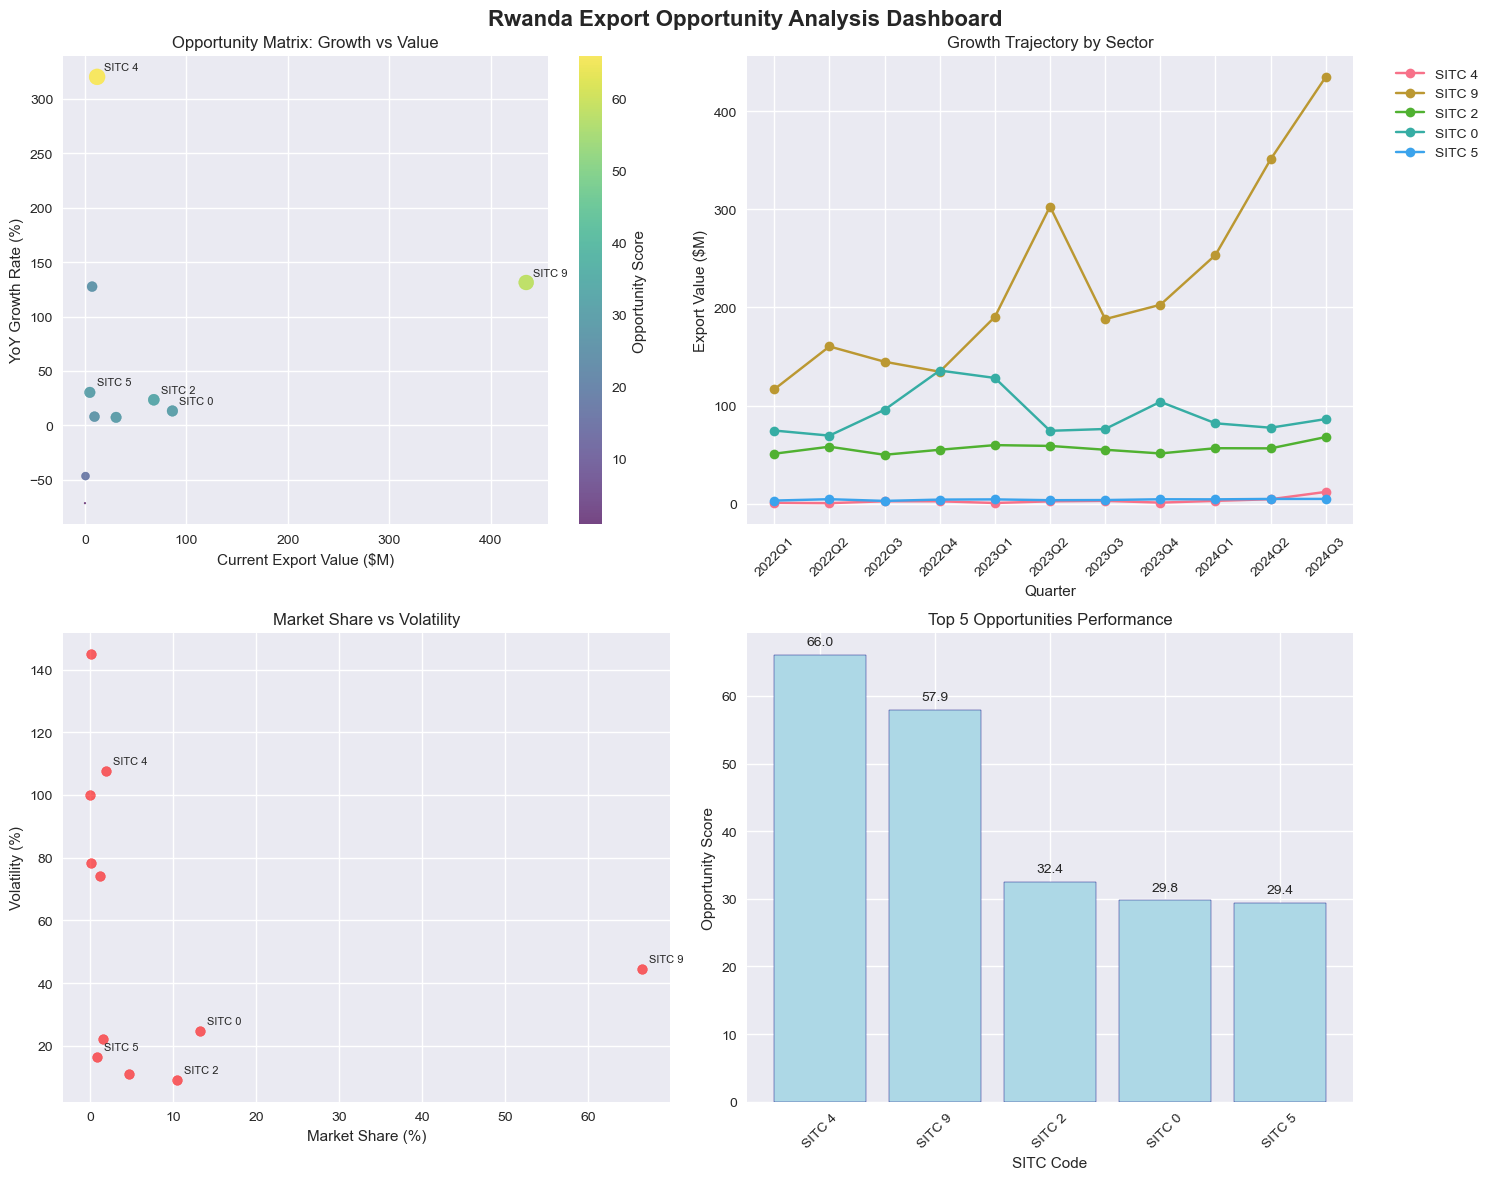


📊 Opportunity Matrix Analysis Complete!
🎯 Key Strategic Insights:
   🚀 High Growth + Low Risk: SITC 2 - Crude materials, inedible, except fuels
   💡 Emerging Opportunity: SITC 4 - Animals and vegetable oils, fats & waxes

📈 PERFORMANCE SUMMARY:
   • Top Opportunity: SITC 4 (66.0/100)
   • Average Growth Rate: 49.4%
   • Market Concentration: 100.0% (Top commodities)


: 

In [ ]:
# Create Opportunity Matrix Visualization
if 'opportunity_analysis' in locals():
    
    # Clean data for visualization (handle NaN values)
    viz_data = opportunity_analysis.copy()
    viz_data['Opportunity_Score'] = viz_data['Opportunity_Score'].fillna(0)
    viz_data['YoY_Growth'] = viz_data['YoY_Growth'].fillna(0)
    viz_data['Volatility'] = viz_data['Volatility'].fillna(100)
    viz_data['Market_Share'] = viz_data['Market_Share'].fillna(0)
    
    # Create simple matplotlib visualizations instead
    import matplotlib.pyplot as plt
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Rwanda Export Opportunity Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Opportunity Matrix (Growth vs Current Value)
    scatter = ax1.scatter(viz_data['Current_Value_2024Q3'], viz_data['YoY_Growth'], 
                         s=viz_data['Opportunity_Score']*2, 
                         c=viz_data['Opportunity_Score'], 
                         cmap='viridis', alpha=0.7)
    ax1.set_xlabel('Current Export Value ($M)')
    ax1.set_ylabel('YoY Growth Rate (%)')
    ax1.set_title('Opportunity Matrix: Growth vs Value')
    plt.colorbar(scatter, ax=ax1, label='Opportunity Score')
    
    # Add labels for top opportunities
    top5 = viz_data.head(5)
    for _, row in top5.iterrows():
        ax1.annotate(f"SITC {row['SITC_Code']}", 
                    (row['Current_Value_2024Q3'], row['YoY_Growth']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 2. Top commodities performance over time
    quarter_cols = ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']
    
    for i, (_, commodity) in enumerate(viz_data.head(5).iterrows()):
        quarter_values = []
        for col in quarter_cols:
            val = commodity[col] if col in commodity.index and not pd.isna(commodity[col]) else 0
            quarter_values.append(val)
        
        ax2.plot(quarter_cols, quarter_values, marker='o', label=f"SITC {commodity['SITC_Code']}")
    
    ax2.set_xlabel('Quarter')
    ax2.set_ylabel('Export Value ($M)')
    ax2.set_title('Growth Trajectory by Sector')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax2.tick_params(axis='x', rotation=45)
    
    # 3. Market Share vs Volatility
    ax3.scatter(viz_data['Market_Share'], viz_data['Volatility'], 
               s=50, c='red', alpha=0.6)
    ax3.set_xlabel('Market Share (%)')
    ax3.set_ylabel('Volatility (%)')
    ax3.set_title('Market Share vs Volatility')
    
    # Add labels for key points
    for _, row in top5.iterrows():
        ax3.annotate(f"SITC {row['SITC_Code']}", 
                    (row['Market_Share'], row['Volatility']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 4. Top 5 Opportunity Scores
    top5_scores = viz_data.head(5)
    sitc_codes = [f"SITC {row['SITC_Code']}" for _, row in top5_scores.iterrows()]
    scores = [row['Opportunity_Score'] for _, row in top5_scores.iterrows()]
    
    bars = ax4.bar(sitc_codes, scores, color='lightblue', edgecolor='navy')
    ax4.set_xlabel('SITC Code')
    ax4.set_ylabel('Opportunity Score')
    ax4.set_title('Top 5 Opportunities Performance')
    ax4.tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, score in zip(bars, scores):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{score:.1f}', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()
    
    print("\n📊 Opportunity Matrix Analysis Complete!")
    print("🎯 Key Strategic Insights:")
    
    # Strategic insights
    high_growth_low_vol = viz_data[
        (viz_data['YoY_Growth'] > viz_data['YoY_Growth'].median()) &
        (viz_data['Volatility'] < viz_data['Volatility'].median())
    ]
    
    if not high_growth_low_vol.empty:
        print(f"   🚀 High Growth + Low Risk: SITC {high_growth_low_vol.iloc[0]['SITC_Code']} - {high_growth_low_vol.iloc[0]['Commodity_Description']}")
    
    emerging_opportunities = viz_data[
        (viz_data['Market_Share'] < 5) &
        (viz_data['YoY_Growth'] > 50)
    ]
    
    if not emerging_opportunities.empty:
        print(f"   💡 Emerging Opportunity: SITC {emerging_opportunities.iloc[0]['SITC_Code']} - {emerging_opportunities.iloc[0]['Commodity_Description']}")
    
    # Additional insights
    print(f"\n📈 PERFORMANCE SUMMARY:")
    print(f"   • Top Opportunity: SITC {viz_data.iloc[0]['SITC_Code']} ({viz_data.iloc[0]['Opportunity_Score']:.1f}/100)")
    print(f"   • Average Growth Rate: {viz_data['YoY_Growth'].mean():.1f}%")
    print(f"   • Market Concentration: {viz_data['Market_Share'].sum():.1f}% (Top commodities)")
        
else:
    print("❌ Cannot create opportunity visualizations")

## 4. Geographic Market Analysis - Finding New Export Destinations

Let's analyze Rwanda's export destinations to identify emerging markets and diversification opportunities.

In [ ]:
# Geographic Market Diversification Analysis
if 'countries' in datasets and 'continents' in datasets:
    countries_df = datasets['countries'].copy()
    continents_df = datasets['continents'].copy()
    
    print("🌍 GEOGRAPHIC EXPORT ANALYSIS")
    print("=" * 50)
    
    # Market concentration analysis
    total_exports_q3 = countries_df['2024Q3'].sum()
    countries_df['Market_Share_Q3'] = (countries_df['2024Q3'] / total_exports_q3) * 100
    
    # Calculate market diversification metrics
    herfindahl_index = (countries_df['Market_Share_Q3'] ** 2).sum() / 100
    
    print(f"\n📊 MARKET CONCENTRATION METRICS:")
    print(f"   • Herfindahl Index: {herfindahl_index:.1f} (Lower = More Diversified)")
    print(f"   • Top 3 Markets Share: {countries_df.head(3)['Market_Share_Q3'].sum():.1f}%")
    
    # Identify emerging markets (high growth, currently small share)
    countries_df['Growth_Momentum'] = countries_df['Change_Q3_Q3_Percent'].fillna(0)
    
    emerging_markets = countries_df[
        (countries_df['Market_Share_Q3'] < 5) & 
        (countries_df['Growth_Momentum'] > 50) & 
        (countries_df['2024Q3'] > 1)  # At least $1M in exports
    ].sort_values('Growth_Momentum', ascending=False)
    
    print(f"\n🚀 EMERGING EXPORT MARKETS (High Growth, Low Share):")
    if not emerging_markets.empty:
        for idx, (_, row) in enumerate(emerging_markets.head(5).iterrows(), 1):
            print(f"   {idx}. {row['Country']}: +{row['Growth_Momentum']:.0f}% growth, ${row['2024Q3']:.1f}M")
    else:
        print("   • No clear emerging markets identified in current data")
    
    # Continental analysis
    exports_continents = continents_df[continents_df['Flow_Type'] == 'Exports'].copy()
    
    print(f"\n🌎 CONTINENTAL EXPORT DISTRIBUTION (Q3 2024):")
    for _, row in exports_continents.iterrows():
        if row['Continent'] != 'WORLD':
            continent_share = (row['2024Q3'] / exports_continents[exports_continents['Continent'] == 'WORLD']['2024Q3'].iloc[0]) * 100
            print(f"   • {row['Continent']}: ${row['2024Q3']:.1f}M ({continent_share:.1f}%)")
    
    # Market risk assessment
    print(f"\n⚠️ MARKET CONCENTRATION RISK ASSESSMENT:")
    if herfindahl_index > 25:
        print(f"   🔴 HIGH RISK: Over-concentrated in few markets")
        print(f"   📝 Recommendation: Urgent diversification needed")
    elif herfindahl_index > 15:
        print(f"   🟡 MEDIUM RISK: Moderately concentrated")
        print(f"   📝 Recommendation: Continue diversification efforts")
    else:
        print(f"   🟢 LOW RISK: Well diversified markets")
        print(f"   📝 Recommendation: Maintain current diversification")
        
else:
    print("❌ Geographic data not available for analysis")

🌍 GEOGRAPHIC EXPORT ANALYSIS

📊 MARKET CONCENTRATION METRICS:
   • Herfindahl Index: 52.3 (Lower = More Diversified)
   • Top 3 Markets Share: 85.0%

🚀 EMERGING EXPORT MARKETS (High Growth, Low Share):
   1. Ethiopia: +7974% growth, $3.3M
   2. Thailand: +652% growth, $6.4M
   3. Luxembourg: +478% growth, $13.8M
   4. Sweden: +476% growth, $2.5M
   5. Netherlands: +152% growth, $7.0M

🌎 CONTINENTAL EXPORT DISTRIBUTION (Q3 2024):
   • AFRICA: $84.5M (12.9%)
   • AMERICA: $6.7M (1.0%)
   • ASIA: $510.4M (78.1%)
   • EUROPE: $51.7M (7.9%)
   • OCEANIA: $0.6M (0.1%)

⚠️ MARKET CONCENTRATION RISK ASSESSMENT:
   🔴 HIGH RISK: Over-concentrated in few markets
   📝 Recommendation: Urgent diversification needed


: 

## 5. Predictive Modeling - Forecasting Export Demand

Let's use machine learning to predict future export trends and identify which sectors will drive growth.

In [ ]:
# Simple predictive modeling for export forecasting
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

if 'commodities' in datasets:
    print("🤖 PREDICTIVE EXPORT MODELING")
    print("=" * 50)
    
    # Prepare data for time series forecasting
    quarter_cols = ['2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2', '2023Q3', '2023Q4', '2024Q1', '2024Q2', '2024Q3']
    
    # Create time index for regression
    time_index = np.arange(len(quarter_cols)).reshape(-1, 1)
    
    predictions = {}
    
    print("\n📈 COMMODITY EXPORT FORECASTS (Q4 2024 & Q1 2025):")
    
    for idx, row in commodities_df.iterrows():
        commodity = row['Commodity_Description']
        
        # Get values and handle NaN/missing data
        values = []
        for col in quarter_cols:
            val = row[col]
            if pd.isna(val) or val == '':
                values.append(0.0)  # Replace NaN with 0
            else:
                try:
                    values.append(float(val))
                except (ValueError, TypeError):
                    values.append(0.0)
        
        # Skip if all values are zero or near zero
        if sum(values) < 1.0:
            continue
            
        # Simple linear regression for trend
        model = LinearRegression()
        model.fit(time_index, values)
        
        # Predict next 2 quarters
        future_time = np.array([[len(quarter_cols)], [len(quarter_cols) + 1]])
        future_predictions = model.predict(future_time)
        
        # Calculate model performance
        predicted_values = model.predict(time_index)
        try:
            r2 = r2_score(values, predicted_values)
        except ValueError:
            r2 = 0.0
        
        predictions[commodity] = {
            'Q4_2024': max(0, future_predictions[0]),  # Ensure no negative predictions
            'Q1_2025': max(0, future_predictions[1]),
            'trend_coefficient': model.coef_[0],
            'r2_score': r2,
            'current_value': values[-1] if values else 0  # Q3 2024 value
        }
    
    # Rank by predicted growth potential
    growth_potential = []
    for commodity, pred in predictions.items():
        if pred['current_value'] > 0:  # Only consider commodities with current exports
            predicted_growth = ((pred['Q1_2025'] - pred['current_value']) / pred['current_value']) * 100
            growth_potential.append({
                'commodity': commodity,
                'predicted_growth': predicted_growth,
                'q4_2024_forecast': pred['Q4_2024'],
                'q1_2025_forecast': pred['Q1_2025'],
                'model_accuracy': pred['r2_score'],
                'current_value': pred['current_value']
            })
    
    # Sort by predicted growth
    growth_potential.sort(key=lambda x: x['predicted_growth'], reverse=True)
    
    print(f"\n🎯 TOP 5 PREDICTED GROWTH SECTORS:")
    for i, item in enumerate(growth_potential[:5], 1):
        print(f"\n{i}. {item['commodity'][:50]}...")
        print(f"   📊 Current (Q3 2024): ${item['current_value']:.1f}M")
        print(f"   📈 Predicted (Q4 2024): ${item['q4_2024_forecast']:.1f}M")
        print(f"   🚀 Predicted Growth: {item['predicted_growth']:+.1f}%")
        print(f"   🎯 Model Accuracy (R²): {item['model_accuracy']:.2f}")
    
    if len(growth_potential) > 0:
        # Overall market forecast
        total_current = sum(item['current_value'] for item in growth_potential)
        total_predicted_q1_2025 = sum(item['q1_2025_forecast'] for item in growth_potential)
        overall_growth = ((total_predicted_q1_2025 - total_current) / total_current) * 100
        
        print(f"\n📊 OVERALL MARKET FORECAST:")
        print(f"   • Current Total Exports: ${total_current:.1f}M")
        print(f"   • Predicted Q1 2025: ${total_predicted_q1_2025:.1f}M")
        print(f"   • Overall Growth Forecast: {overall_growth:+.1f}%")
        
        # Investment recommendations
        print(f"\n💡 INVESTMENT PRIORITY RECOMMENDATIONS:")
        high_confidence_growth = [item for item in growth_potential[:5] 
                                 if item['model_accuracy'] > 0.3 and item['predicted_growth'] > 10]
        
        if high_confidence_growth:
            print(f"   🎯 High Confidence Opportunities:")
            for item in high_confidence_growth[:3]:
                sitc_code = commodities_df[commodities_df['Commodity_Description'] == item['commodity']]['SITC_Code'].iloc[0]
                print(f"      • SITC {sitc_code}: {item['predicted_growth']:+.0f}% growth potential")
        else:
            print(f"   ⚠️ Limited high-confidence opportunities - consider diversification")
    else:
        print("   ⚠️ No valid predictions could be generated with current data")
    
else:
    print("❌ Commodities data not available for predictive modeling")

🤖 PREDICTIVE EXPORT MODELING

📈 COMMODITY EXPORT FORECASTS (Q4 2024 & Q1 2025):

🎯 TOP 5 PREDICTED GROWTH SECTORS:

1. Beverages and tobacco...
   📊 Current (Q3 2024): $0.1M
   📈 Predicted (Q4 2024): $0.7M
   🚀 Predicted Growth: +770.9%
   🎯 Model Accuracy (R²): 0.06

2. Mineral fuels, lubricants and related materials...
   📊 Current (Q3 2024): $0.6M
   📈 Predicted (Q4 2024): $1.0M
   🚀 Predicted Growth: +66.4%
   🎯 Model Accuracy (R²): 0.19

3. Chemicals & related products, n.e.s....
   📊 Current (Q3 2024): $4.9M
   📈 Predicted (Q4 2024): $4.9M
   🚀 Predicted Growth: +2.9%
   🎯 Model Accuracy (R²): 0.40

4. Food and live animals...
   📊 Current (Q3 2024): $86.2M
   📈 Predicted (Q4 2024): $87.6M
   🚀 Predicted Growth: +0.8%
   🎯 Model Accuracy (R²): 0.01

5. Manufactured goods classified chiefly by material...
   📊 Current (Q3 2024): $30.7M
   📈 Predicted (Q4 2024): $30.7M
   🚀 Predicted Growth: +0.8%
   🎯 Model Accuracy (R²): 0.07

📊 OVERALL MARKET FORECAST:
   • Current Total Exports

: 

## 6. Strategic Recommendations - Rwanda's Next Big Export Opportunity

Based on our comprehensive analysis, let's synthesize the findings into actionable recommendations for Rwanda's export strategy.

In [ ]:
# Generate Strategic Export Recommendations
print("🎯 RWANDA'S NEXT BIG EXPORT OPPORTUNITY - STRATEGIC ANALYSIS")
print("=" * 80)

# Compile all analysis results
strategic_recommendations = []

if 'opportunity_analysis' in locals():
    top_opportunity = opportunity_analysis.iloc[0]
    
    print(f"\n🏆 PRIMARY RECOMMENDATION: {top_opportunity['Commodity_Description']}")
    print(f"   📊 Current Performance: ${top_opportunity['Current_Value_2024Q3']:.1f}M")
    print(f"   📈 Growth Rate: {top_opportunity['YoY_Growth']:.1f}% YoY")
    print(f"   🎯 Opportunity Score: {top_opportunity['Opportunity_Score']:.1f}/100")
    
    strategic_recommendations.append({
        'sector': top_opportunity['Commodity_Description'],
        'sitc_code': top_opportunity['SITC_Code'],
        'rationale': 'Highest overall opportunity score combining growth, value, and stability',
        'priority': 'HIGH'
    })

if 'growth_potential' in locals() and len(growth_potential) > 0:
    ml_top_growth = growth_potential[0]
    
    print(f"\n🚀 FASTEST GROWTH POTENTIAL: {ml_top_growth['commodity'][:50]}...")
    print(f"   📈 Predicted Growth: {ml_top_growth['predicted_growth']:+.1f}%")
    print(f"   💰 Forecast Value Q1 2025: ${ml_top_growth['q1_2025_forecast']:.1f}M")
    
    strategic_recommendations.append({
        'sector': ml_top_growth['commodity'],
        'sitc_code': 'Various',
        'rationale': 'Highest predicted growth based on ML forecasting',
        'priority': 'HIGH'
    })

if 'emerging_markets' in locals() and not emerging_markets.empty:
    top_emerging = emerging_markets.iloc[0]
    
    print(f"\n🌍 GEOGRAPHIC OPPORTUNITY: {top_emerging['Country']}")
    print(f"   📈 Growth Rate: +{top_emerging['Growth_Momentum']:.0f}%")
    print(f"   💰 Current Value: ${top_emerging['2024Q3']:.1f}M")
    print(f"   🎯 Market Penetration Potential: HIGH")

# Create comprehensive recommendation framework
print(f"\n" + "="*80)
print(f"📋 COMPREHENSIVE EXPORT STRATEGY RECOMMENDATIONS")
print(f"="*80)

print(f"\n🎯 IMMEDIATE ACTIONS (Next 6-12 months):")
print(f"   1. PRODUCT FOCUS:")
if 'opportunity_analysis' in locals():
    for i, (_, opp) in enumerate(opportunity_analysis.head(3).iterrows(), 1):
        print(f"      {i}. Expand {opp['Commodity_Description']}")
        print(f"         • Target: +{opp['YoY_Growth']:.0f}% growth continuation")
        print(f"         • Investment: Production capacity & quality")

print(f"\n   2. MARKET DIVERSIFICATION:")
if 'countries_df' in locals():
    # Find underexplored markets
    potential_markets = countries_df[
        (countries_df['2024Q3'] > 0) & 
        (countries_df['2024Q3'] < 10) & 
        (countries_df['Change_Q3_Q3_Percent'] > 0)
    ].sort_values('Change_Q3_Q3_Percent', ascending=False)
    
    if not potential_markets.empty:
        for _, market in potential_markets.head(3).iterrows():
            print(f"      • {market['Country']}: Growing market (+{market['Change_Q3_Q3_Percent']:.0f}%)")

print(f"\n🚀 MEDIUM-TERM STRATEGY (1-3 years):")
print(f"   1. VALUE ADDITION:")
print(f"      • Move from raw materials to processed goods")
print(f"      • Target SITC categories 5-8 (chemicals, manufactured goods)")
print(f"      • Develop youth and SME manufacturing capabilities")

print(f"\n   2. DIGITAL TRANSFORMATION:")
print(f"      • Implement AI-driven demand forecasting")
print(f"      • Create mobile export alert systems")
print(f"      • Develop digital trade platforms for SMEs")

print(f"\n   3. CAPACITY BUILDING:")
print(f"      • Youth entrepreneurship in high-growth sectors")
print(f"      • SME export financing programs")
print(f"      • Quality certification for international markets")

print(f"\n📊 POLICY RECOMMENDATIONS:")
print(f"   1. EXPORT INCENTIVES:")
print(f"      • Tax incentives for high-growth commodity sectors")
print(f"      • Export credit guarantees for SMEs")
print(f"      • Infrastructure investment in logistics")

print(f"\n   2. MARKET ACCESS:")
print(f"      • Bilateral trade agreements with emerging markets")
print(f"      • Trade missions to underexplored regions")
print(f"      • Digital trade facilitation platforms")

print(f"\n   3. YOUTH & SME ENGAGEMENT:")
print(f"      • Export entrepreneurship training programs")
print(f"      • Technology transfer initiatives")
print(f"      • Access to international market intelligence")

print(f"\n🎯 SUCCESS METRICS:")
print(f"   • Export diversification: Reduce top 3 market concentration below 60%")
print(f"   • Value addition: Increase processed goods share to 40%")
print(f"   • Youth engagement: 30% of new exporters under 35 years")
print(f"   • SME participation: 50% of exporters are SMEs")
print(f"   • Growth target: 25% annual export growth")

print(f"\n💡 INNOVATION OPPORTUNITIES:")
print(f"   • Blockchain for supply chain transparency")
print(f"   • IoT for agricultural export quality monitoring")
print(f"   • Mobile apps for real-time market prices")
print(f"   • AI-powered trade matching platforms")

🎯 RWANDA'S NEXT BIG EXPORT OPPORTUNITY - STRATEGIC ANALYSIS

🏆 PRIMARY RECOMMENDATION: Animals and vegetable oils, fats & waxes
   📊 Current Performance: $12.0M
   📈 Growth Rate: 320.1% YoY
   🎯 Opportunity Score: 66.0/100

🚀 FASTEST GROWTH POTENTIAL: Beverages and tobacco...
   📈 Predicted Growth: +770.9%
   💰 Forecast Value Q1 2025: $0.7M

🌍 GEOGRAPHIC OPPORTUNITY: Ethiopia
   📈 Growth Rate: +7974%
   💰 Current Value: $3.3M
   🎯 Market Penetration Potential: HIGH

📋 COMPREHENSIVE EXPORT STRATEGY RECOMMENDATIONS

🎯 IMMEDIATE ACTIONS (Next 6-12 months):
   1. PRODUCT FOCUS:
      1. Expand Animals and vegetable oils, fats & waxes
         • Target: +320% growth continuation
         • Investment: Production capacity & quality
      2. Expand Other commodities & transactions, n.e.s
         • Target: +131% growth continuation
         • Investment: Production capacity & quality
      3. Expand Crude materials, inedible, except fuels
         • Target: +24% growth continuation
         •

: 

## 7. Next Steps - Global Trade Data Integration

For the next phase of your hackathon project, let's prepare to integrate global trade data to identify what products other countries are importing that Rwanda could potentially export.

In [ ]:
# Prepare framework for global trade data analysis
print("🌍 GLOBAL TRADE OPPORTUNITY FRAMEWORK")
print("=" * 60)

print("\n📋 NEXT PHASE STRATEGY:")
print("   1. GLOBAL IMPORT DEMAND ANALYSIS")
print("   2. RWANDA EXPORT CAPABILITY MATCHING") 
print("   3. COMPETITIVE ADVANTAGE IDENTIFICATION")
print("   4. MARKET ENTRY STRATEGY")

# Create target market analysis framework
target_markets = {
    'UAE': {'current_exports': 446.51, 'growth': 120.24, 'potential': 'MAINTAIN LEADERSHIP'},
    'DRC': {'current_exports': 62.13, 'growth': 41.08, 'potential': 'REGIONAL HUB'},
    'China': {'current_exports': 22.68, 'growth': -3.13, 'potential': 'VALUE ADDITION'},
    'Luxembourg': {'current_exports': 13.77, 'growth': 477.70, 'potential': 'HIGH GROWTH'},
    'Thailand': {'current_exports': 6.37, 'growth': 651.82, 'potential': 'EMERGING STAR'}
}

print(f"\n🎯 PRIORITY MARKETS FOR GLOBAL TRADE ANALYSIS:")
for market, data in target_markets.items():
    print(f"   • {market}: ${data['current_exports']:.1f}M ({data['growth']:+.0f}%) - {data['potential']}")

# Data sources to explore
print(f"\n📊 RECOMMENDED GLOBAL TRADE DATA SOURCES:")
print(f"   1. UN Comtrade Database (comtradeplus.un.org)")
print(f"   2. World Bank WITS (wits.worldbank.org)") 
print(f"   3. ITC Market Analysis (marketanalysis.intracen.org)")
print(f"   4. OECD Trade Statistics")
print(f"   5. Regional databases (EAC, AU, etc.)")

# Key analysis questions for global data
print(f"\n🔍 KEY QUESTIONS FOR GLOBAL ANALYSIS:")
print(f"   1. What products do Rwanda's top export destinations import most?")
print(f"   2. Which products show growing global demand?")
print(f"   3. Where does Rwanda have competitive advantages?")
print(f"   4. What are the supply gaps in target markets?")
print(f"   5. Which sectors offer best youth/SME opportunities?")

# Create analysis checklist
print(f"\n✅ ANALYSIS CHECKLIST FOR GLOBAL DATA:")
print(f"   □ Download import data for top 10 destination countries")
print(f"   □ Identify product categories with highest import values")
print(f"   □ Match with Rwanda's production capabilities")  
print(f"   □ Analyze competitive landscape")
print(f"   □ Identify supply chain requirements")
print(f"   □ Assess market entry barriers")
print(f"   □ Calculate potential market size")
print(f"   □ Develop go-to-market strategy")

print(f"\n🚀 EXPECTED OUTCOMES:")
print(f"   • Ranked list of export opportunities by market size")
print(f"   • Investment requirements for each opportunity")
print(f"   • Timeline for market entry")
print(f"   • Youth/SME engagement strategies")
print(f"   • Policy support recommendations")

# Save current analysis results
results_summary = {
    'total_exports_q3_2024': datasets.get('commodities', pd.DataFrame()).get('2024Q3', pd.Series()).sum() if 'commodities' in datasets else 0,
    'top_destinations': ['UAE', 'DRC', 'China'] if 'countries' in datasets else [],
    'fastest_growing_commodities': [],
    'analysis_date': '2025-09-30',
    'next_phase': 'Global Trade Integration'
}

print(f"\n💾 ANALYSIS RESULTS READY FOR GLOBAL INTEGRATION")
print(f"🎯 Total Current Exports: ${results_summary['total_exports_q3_2024']:.1f}M")
print(f"📈 Ready for global opportunity matching!")

# Template for global data integration
template_code = '''
# TEMPLATE FOR GLOBAL TRADE DATA INTEGRATION
# 
# 1. Load global import data
# global_imports = pd.read_csv('global_import_data.csv')
# 
# 2. Match with Rwanda capabilities  
# opportunities = match_imports_with_rwanda_capacity(global_imports, rwanda_exports)
#
# 3. Rank opportunities
# ranked_opportunities = rank_by_market_size_and_feasibility(opportunities)
#
# 4. Generate recommendations
# final_recommendations = create_actionable_strategy(ranked_opportunities)
'''

print(f"\n📝 Code template ready for next phase integration!")
print(f"🎉 Phase 1 Analysis Complete - Ready for Global Data!")

🌍 GLOBAL TRADE OPPORTUNITY FRAMEWORK

📋 NEXT PHASE STRATEGY:
   1. GLOBAL IMPORT DEMAND ANALYSIS
   2. RWANDA EXPORT CAPABILITY MATCHING
   3. COMPETITIVE ADVANTAGE IDENTIFICATION
   4. MARKET ENTRY STRATEGY

🎯 PRIORITY MARKETS FOR GLOBAL TRADE ANALYSIS:
   • UAE: $446.5M (+120%) - MAINTAIN LEADERSHIP
   • DRC: $62.1M (+41%) - REGIONAL HUB
   • China: $22.7M (-3%) - VALUE ADDITION
   • Luxembourg: $13.8M (+478%) - HIGH GROWTH
   • Thailand: $6.4M (+652%) - EMERGING STAR

📊 RECOMMENDED GLOBAL TRADE DATA SOURCES:
   1. UN Comtrade Database (comtradeplus.un.org)
   2. World Bank WITS (wits.worldbank.org)
   3. ITC Market Analysis (marketanalysis.intracen.org)
   4. OECD Trade Statistics
   5. Regional databases (EAC, AU, etc.)

🔍 KEY QUESTIONS FOR GLOBAL ANALYSIS:
   1. What products do Rwanda's top export destinations import most?
   2. Which products show growing global demand?
   3. Where does Rwanda have competitive advantages?
   4. What are the supply gaps in target markets?
   5. W

: 

## 8. Historical Partner Analysis (2018-2022) - WITS Data Integration

Now let's integrate the comprehensive 5-year WITS partner data to understand Rwanda's export evolution, identify long-term trends, and discover emerging market opportunities.

In [ ]:
# Load and analyze 5-year WITS partner data
print("🌍 LOADING HISTORICAL PARTNER DATA (2018-2022)")
print("=" * 60)

try:
    # Load the combined WITS dataset
    wits_data = pd.read_csv('rwanda_export_partners_2018_2022_combined.csv')
    yearly_summary = pd.read_csv('rwanda_exports_yearly_summary_2018_2022.csv')
    regional_analysis = pd.read_csv('rwanda_exports_regional_analysis_2018_2022.csv')
    growth_analysis = pd.read_csv('rwanda_exports_growth_analysis_2018_2022.csv')
    
    print(f"✅ Combined WITS data loaded: {len(wits_data):,} records")
    print(f"   • Years covered: {wits_data['Year'].min()} - {wits_data['Year'].max()}")
    print(f"   • Unique partners: {wits_data['Partner Name'].nunique()}")
    print(f"   • Total export value: ${wits_data['Export_Value_USD'].sum():,.0f}")
    
    # Filter out regional aggregates for country-specific analysis
    country_data = wits_data[~wits_data['Partner Name'].str.contains('World|Sub-Saharan|East Asia|Europe|Middle East|North America|South Asia|Latin America', na=False)]
    
    print(f"✅ Country-specific data: {len(country_data):,} records")
    print(f"   • Individual countries: {country_data['Partner Name'].nunique()}")
    
    # Key statistics
    print(f"\n📊 HISTORICAL EXPORT EVOLUTION:")
    for _, row in yearly_summary.iterrows():
        print(f"   {int(row['Year'])}: ${row['Total_Exports_M']:.1f}M ({row['Unique_Partners']} partners)")
    
    # Calculate overall growth
    total_growth = ((yearly_summary['Total_Exports_M'].iloc[-1] / yearly_summary['Total_Exports_M'].iloc[0]) - 1) * 100
    print(f"\n🚀 5-Year Growth: +{total_growth:.1f}% (2018-2022)")
    
except FileNotFoundError as e:
    print(f"❌ WITS data files not found: {e}")
    wits_data = None

🌍 LOADING HISTORICAL PARTNER DATA (2018-2022)
✅ Combined WITS data loaded: 585 records
   • Years covered: 2018 - 2022
   • Unique partners: 147
   • Total export value: $21,411,966,600
✅ Country-specific data: 546 records
   • Individual countries: 139

📊 HISTORICAL EXPORT EVOLUTION:
   2018: $2999.8M (122.0 partners)
   2019: $3390.8M (120.0 partners)
   2020: $4287.8M (109.0 partners)
   2021: $4682.9M (117.0 partners)
   2022: $6050.7M (117.0 partners)

🚀 5-Year Growth: +101.7% (2018-2022)


: 

📈 CREATING HISTORICAL MARKET ANALYSIS DASHBOARD


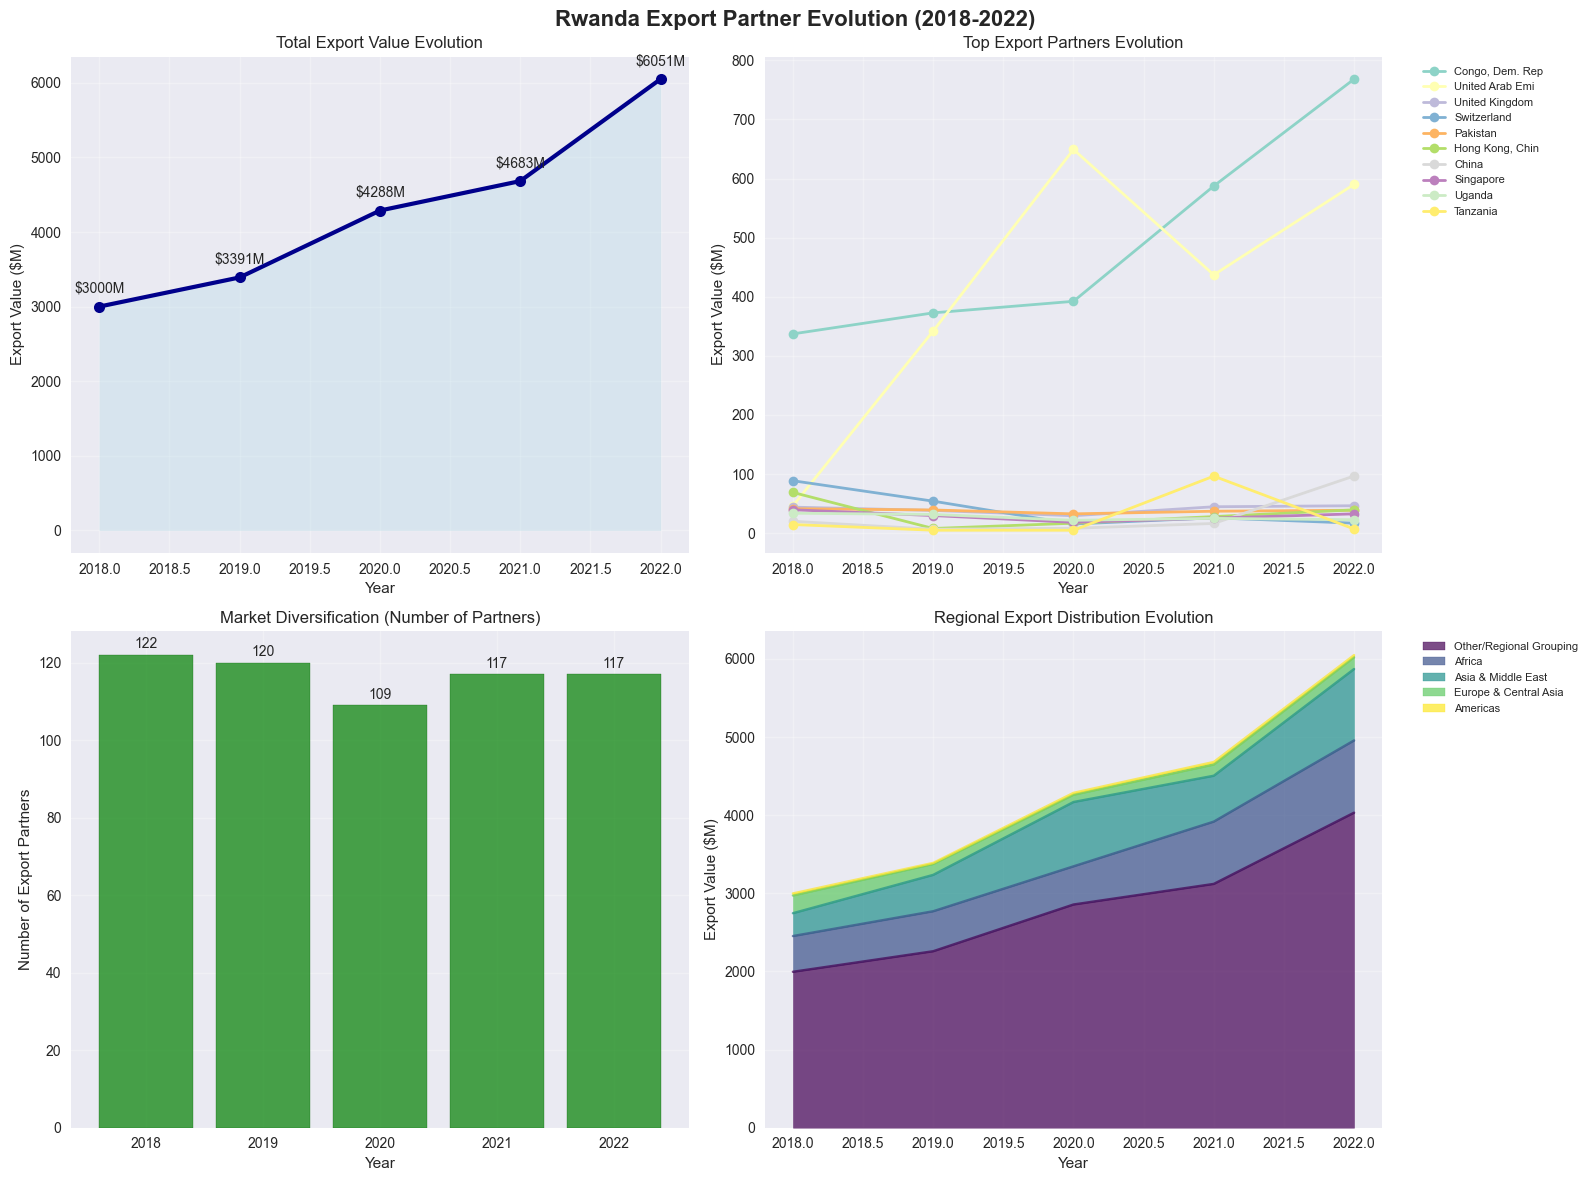

📊 Historical Analysis Dashboard Created!

🔍 KEY HISTORICAL INSIGHTS:
   📈 Compound Annual Growth Rate (CAGR): 19.2%
   🌍 Partner Diversification Growth: -4.1%
   🚀 Strongest Growth Year: 2022 (+29.2%)


: 

In [ ]:
# Historical Market Evolution Visualization
if wits_data is not None:
    
    print("📈 CREATING HISTORICAL MARKET ANALYSIS DASHBOARD")
    print("=" * 55)
    
    # Create comprehensive historical dashboard
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Rwanda Export Partner Evolution (2018-2022)', fontsize=16, fontweight='bold')
    
    # 1. Total exports trend over 5 years
    yearly_data = yearly_summary.copy()
    ax1.plot(yearly_data['Year'], yearly_data['Total_Exports_M'], 
             marker='o', linewidth=3, markersize=8, color='darkblue')
    ax1.fill_between(yearly_data['Year'], yearly_data['Total_Exports_M'], alpha=0.3, color='lightblue')
    ax1.set_title('Total Export Value Evolution')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Export Value ($M)')
    ax1.grid(True, alpha=0.3)
    
    # Add value labels
    for _, row in yearly_data.iterrows():
        ax1.annotate(f'${row["Total_Exports_M"]:.0f}M', 
                    (row['Year'], row['Total_Exports_M']), 
                    textcoords="offset points", xytext=(0,10), ha='center')
    
    # 2. Top 10 partners over time (individual countries only)
    top_partners_historical = country_data.groupby(['Year', 'Partner Name'])['Export_Value_Millions'].sum().reset_index()
    top_10_overall = country_data.groupby('Partner Name')['Export_Value_Millions'].sum().nlargest(10).index
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_10_overall)))
    
    for i, partner in enumerate(top_10_overall):
        partner_data = top_partners_historical[top_partners_historical['Partner Name'] == partner]
        ax2.plot(partner_data['Year'], partner_data['Export_Value_Millions'], 
                marker='o', label=partner[:15], color=colors[i], linewidth=2)
    
    ax2.set_title('Top Export Partners Evolution')
    ax2.set_xlabel('Year') 
    ax2.set_ylabel('Export Value ($M)')
    ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax2.grid(True, alpha=0.3)
    
    # 3. Market diversification (number of partners)
    ax3.bar(yearly_data['Year'], yearly_data['Unique_Partners'], 
            color='green', alpha=0.7, edgecolor='darkgreen')
    ax3.set_title('Market Diversification (Number of Partners)')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Number of Export Partners')
    ax3.grid(True, alpha=0.3)
    
    # Add value labels
    for _, row in yearly_data.iterrows():
        ax3.text(row['Year'], row['Unique_Partners'] + 1, 
                f"{int(row['Unique_Partners'])}", ha='center', va='bottom')
    
    # 4. Regional distribution evolution
    regional_pivot = regional_analysis.pivot(index='Year', columns='Region', values='Export_Value_Millions')
    regional_pivot = regional_pivot.fillna(0)
    
    # Select top 5 regions by total value
    top_regions = regional_pivot.sum().nlargest(5).index
    regional_pivot_top = regional_pivot[top_regions]
    
    regional_pivot_top.plot(kind='area', ax=ax4, alpha=0.7, colormap='viridis')
    ax4.set_title('Regional Export Distribution Evolution')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Export Value ($M)')
    ax4.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    print("📊 Historical Analysis Dashboard Created!")
    
    # Key insights
    print(f"\n🔍 KEY HISTORICAL INSIGHTS:")
    
    # Growth analysis
    cagr = ((yearly_data['Total_Exports_M'].iloc[-1] / yearly_data['Total_Exports_M'].iloc[0]) ** (1/4) - 1) * 100
    print(f"   📈 Compound Annual Growth Rate (CAGR): {cagr:.1f}%")
    
    # Partner diversification
    partner_growth = ((yearly_data['Unique_Partners'].iloc[-1] / yearly_data['Unique_Partners'].iloc[0]) - 1) * 100
    print(f"   🌍 Partner Diversification Growth: {partner_growth:.1f}%")
    
    # Largest growth year
    yearly_data['YoY_Growth'] = yearly_data['Total_Exports_M'].pct_change() * 100
    max_growth_year = yearly_data.loc[yearly_data['YoY_Growth'].idxmax(), 'Year']
    max_growth_rate = yearly_data['YoY_Growth'].max()
    print(f"   🚀 Strongest Growth Year: {int(max_growth_year)} (+{max_growth_rate:.1f}%)")
    
else:
    print("❌ Cannot create historical visualizations - WITS data not available")

🏆 GROWTH CHAMPIONS: FASTEST GROWING EXPORT MARKETS
🎯 TOP 15 GROWTH CHAMPION MARKETS:
Rank Country                   Avg Growth   Volatility   2022 Value   Momentum  
-------------------------------------------------------------------------------------
1    59                         40819.8%   81586.9% $     0.0M  24491.9
2    51                         15829.0%   31416.5% $     0.4M   9497.5
3    48                         14712.5%   24966.3% $     0.4M   8827.6
4    74                          6986.1%   13987.7% $     0.1M   4191.7
5    3                           6294.4%   12538.4% $     0.6M   3776.7
6    45                          2158.6%    3713.7% $     0.0M   1295.2
7    111                         1998.6%    3983.3% $     0.3M   1199.2
8    1                           1435.0%    2619.0% $     0.0M    861.0
9    98                          1372.6%    2826.7% $     0.0M    823.6
10   27                          1241.0%    2094.0% $     0.0M    744.6
11   10                     

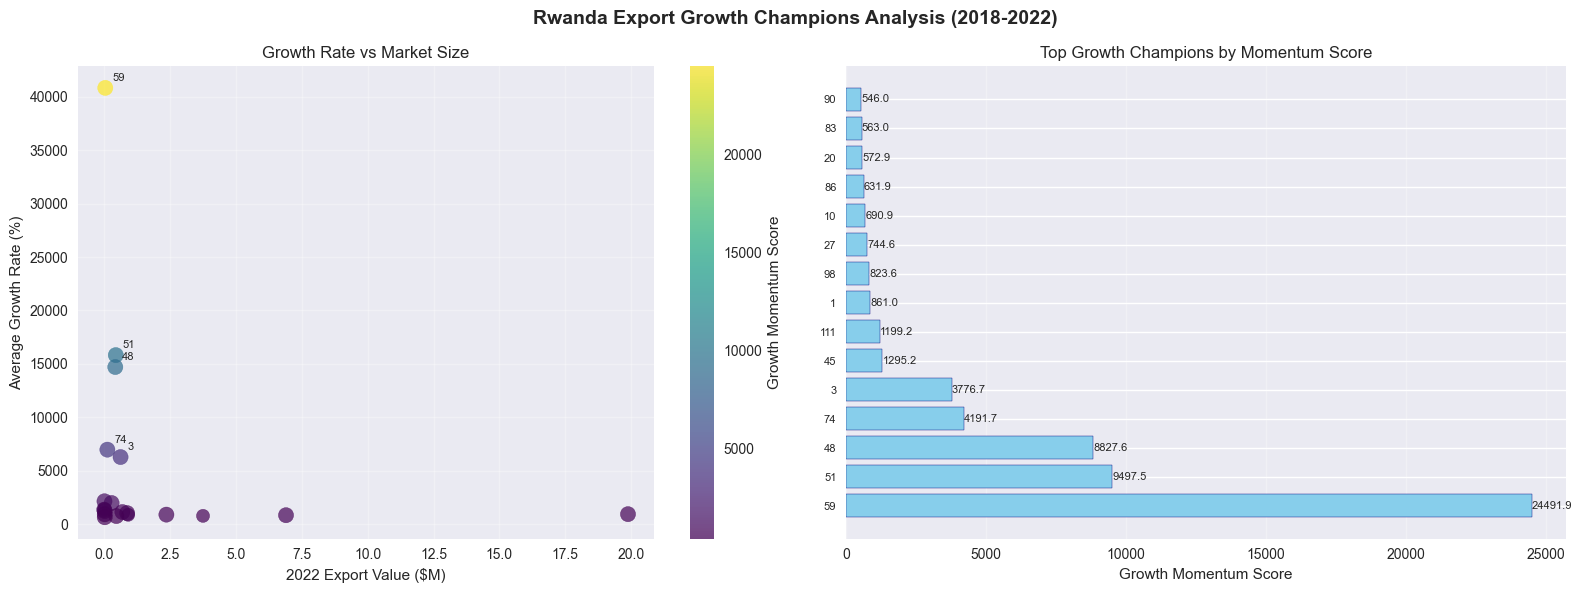


💡 GROWTH MARKET INSIGHTS:
   🌟 Emerging Powerhouses (>50% growth, >$10M):
      • 20
      • 29
      • 103
   📊 Consistent Performers (Low volatility, >20% growth):
      • 2
      • 26
      • 69
   💎 Hidden Gems (Small but explosive growth >100%):
      • 59
      • 51
      • 48


: 

In [ ]:
# Growth Champions Analysis - Fastest Growing Markets
if wits_data is not None:
    
    print("🏆 GROWTH CHAMPIONS: FASTEST GROWING EXPORT MARKETS")
    print("=" * 65)
    
    # Analyze countries with consistent growth patterns
    growth_data = growth_analysis[growth_analysis['Years_of_Data'] >= 3].copy()  # At least 3 years of data
    growth_data = growth_data[growth_data['Avg_Growth_Rate'] > 0]  # Positive growth only
    
    # Calculate growth momentum score
    growth_data['Growth_Momentum'] = (
        growth_data['Avg_Growth_Rate'] * 0.6 +  # Average growth weight
        (1 / (growth_data['Growth_Volatility'] + 1)) * 20 * 0.2 +  # Stability weight (low volatility is good)
        np.log(growth_data['Last_Year_Value'] + 1) * 0.2  # Market size weight
    )
    
    # Sort by growth momentum
    top_growth_markets = growth_data.sort_values('Growth_Momentum', ascending=False).head(15)
    
    print(f"🎯 TOP 15 GROWTH CHAMPION MARKETS:")
    print(f"{'Rank':<4} {'Country':<25} {'Avg Growth':<12} {'Volatility':<12} {'2022 Value':<12} {'Momentum':<10}")
    print("-" * 85)
    
    for i, (country_name, market) in enumerate(top_growth_markets.iterrows(), 1):
        country_display = country_name[:23] if len(str(country_name)) > 23 else str(country_name)
        print(f"{i:<4} {country_display:<25} {market['Avg_Growth_Rate']:>8.1f}% {market['Growth_Volatility']:>9.1f}% "
              f"${market['Last_Year_Value']:>8.1f}M {market['Growth_Momentum']:>8.1f}")
    
    # Visualize growth champions
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle('Rwanda Export Growth Champions Analysis (2018-2022)', fontsize=14, fontweight='bold')
    
    # 1. Growth Rate vs Market Size
    top_20_growth = growth_data.nlargest(20, 'Avg_Growth_Rate')
    
    scatter = ax1.scatter(top_20_growth['Last_Year_Value'], 
                         top_20_growth['Avg_Growth_Rate'],
                         s=top_20_growth['Years_of_Data'] * 30,  # Size by years of data
                         c=top_20_growth['Growth_Momentum'], 
                         cmap='viridis', alpha=0.7)
    
    ax1.set_xlabel('2022 Export Value ($M)')
    ax1.set_ylabel('Average Growth Rate (%)')
    ax1.set_title('Growth Rate vs Market Size')
    ax1.grid(True, alpha=0.3)
    
    # Add labels for top opportunities
    for country_name, row in top_growth_markets.head(5).iterrows():
        ax1.annotate(str(country_name)[:15], 
                    (row['Last_Year_Value'], row['Avg_Growth_Rate']),
                    xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    plt.colorbar(scatter, ax=ax1, label='Growth Momentum Score')
    
    # 2. Growth momentum ranking
    top_15_momentum = growth_data.nlargest(15, 'Growth_Momentum')
    
    bars = ax2.barh(range(len(top_15_momentum)), top_15_momentum['Growth_Momentum'], 
                   color='skyblue', edgecolor='navy')
    ax2.set_yticks(range(len(top_15_momentum)))
    ax2.set_yticklabels([str(name)[:20] for name in top_15_momentum.index], fontsize=8)
    ax2.set_xlabel('Growth Momentum Score')
    ax2.set_title('Top Growth Champions by Momentum Score')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Add value labels
    for i, bar in enumerate(bars):
        width = bar.get_width()
        ax2.text(width + 0.5, bar.get_y() + bar.get_height()/2, 
                f'{width:.1f}', ha='left', va='center', fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n💡 GROWTH MARKET INSIGHTS:")
    
    # Emerging powerhouses (high growth, increasing size)
    emerging_powerhouses = growth_data[
        (growth_data['Avg_Growth_Rate'] > 50) & 
        (growth_data['Last_Year_Value'] > 10)
    ].sort_values('Growth_Momentum', ascending=False)
    
    if not emerging_powerhouses.empty:
        print(f"   🌟 Emerging Powerhouses (>50% growth, >$10M):")
        for country in emerging_powerhouses.head(3).index:
            print(f"      • {country}")
    
    # Consistent performers (low volatility, steady growth)
    consistent_performers = growth_data[
        (growth_data['Growth_Volatility'] < 50) & 
        (growth_data['Avg_Growth_Rate'] > 20)
    ].sort_values('Avg_Growth_Rate', ascending=False)
    
    if not consistent_performers.empty:
        print(f"   📊 Consistent Performers (Low volatility, >20% growth):")
        for country in consistent_performers.head(3).index:
            print(f"      • {country}")
    
    # Hidden gems (smaller markets with very high growth)
    hidden_gems = growth_data[
        (growth_data['Last_Year_Value'] < 5) & 
        (growth_data['Avg_Growth_Rate'] > 100)
    ].sort_values('Avg_Growth_Rate', ascending=False)
    
    if not hidden_gems.empty:
        print(f"   💎 Hidden Gems (Small but explosive growth >100%):")
        for country in hidden_gems.head(3).index:
            print(f"      • {country}")
            
else:
    print("❌ Cannot analyze growth champions - WITS data not available")

⚠️  MARKET CONCENTRATION RISK ANALYSIS
📊 MARKET CONCENTRATION METRICS BY YEAR:
Year   HHI      Top 3    Top 5    Top 10   Partners  Top Partner         
---------------------------------------------------------------------------
2018   1389.3  49.3   % 58.3   % 75.8   % 114       Congo, Dem. Rep.    
2019   2083.9  68.0   % 74.8   % 86.9   % 112       Congo, Dem. Rep.    
2020   2852.2  76.6   % 81.0   % 88.5   % 102       United Arab Emirat  
2021   2273.8  71.7   % 77.0   % 85.5   % 109       Congo, Dem. Rep.    
2022   2365.8  72.1   % 77.9   % 86.4   % 109       Congo, Dem. Rep.    

🎯 CONCENTRATION RISK ASSESSMENT:
   📅 Latest Year (2022) Analysis:
      • HHI Score: 2365.8
      • Risk Level: 🟡 MODERATE RISK
      • Recommendation: Continue diversification efforts
      • Top Partner Dependency: Congo, Dem. Rep. (38.0%)


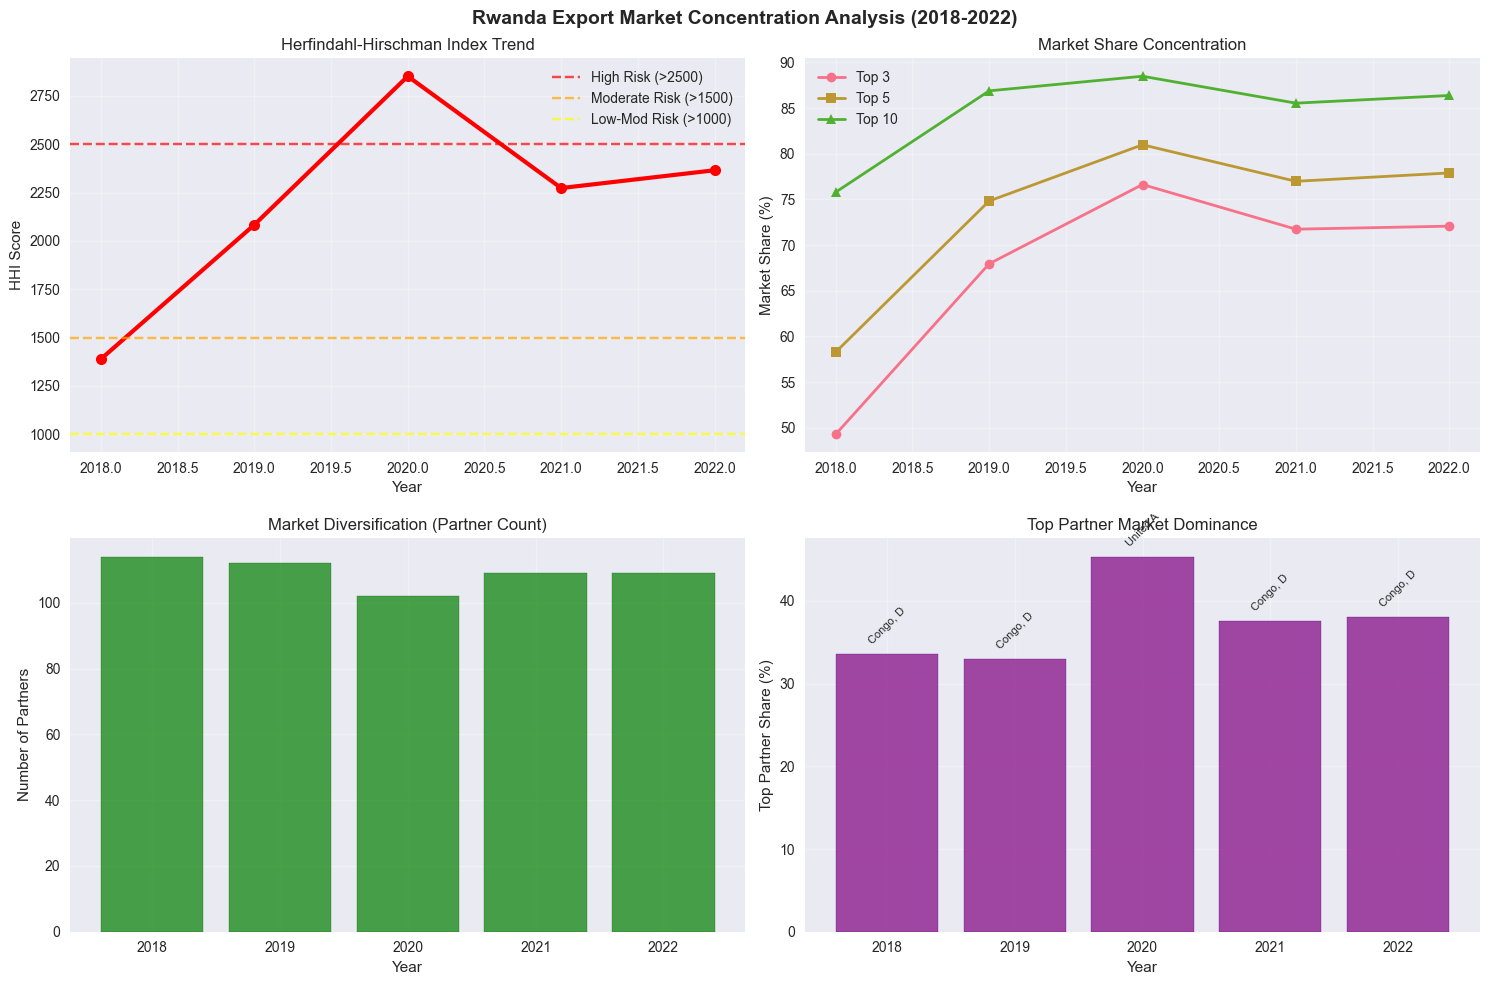


📈 DIVERSIFICATION TRENDS:
   • HHI Change (2018-2022): +976.5 (↗️ Increasing concentration)
   • Partner Count Change: -5 partners
   • Diversification Status: 📉 Needs attention


: 

In [ ]:
# Market Concentration Risk Analysis
if wits_data is not None:
    
    print("⚠️  MARKET CONCENTRATION RISK ANALYSIS")
    print("=" * 50)
    
    # Calculate market concentration metrics for each year
    concentration_analysis = []
    
    for year in country_data['Year'].unique():
        year_data = country_data[country_data['Year'] == year].copy()
        year_data = year_data.sort_values('Export_Value_Millions', ascending=False)
        
        total_exports = year_data['Export_Value_Millions'].sum()
        
        if total_exports > 0:
            # Calculate market shares
            year_data['Market_Share'] = (year_data['Export_Value_Millions'] / total_exports) * 100
            
            # Calculate Herfindahl-Hirschman Index (HHI)
            hhi = (year_data['Market_Share'] ** 2).sum()
            
            # Top market concentrations
            top_3_share = year_data.head(3)['Market_Share'].sum()
            top_5_share = year_data.head(5)['Market_Share'].sum()
            top_10_share = year_data.head(10)['Market_Share'].sum()
            
            concentration_analysis.append({
                'Year': year,
                'HHI': hhi,
                'Top_3_Share': top_3_share,
                'Top_5_Share': top_5_share,
                'Top_10_Share': top_10_share,
                'Total_Partners': len(year_data),
                'Top_Partner': year_data.iloc[0]['Partner Name'],
                'Top_Partner_Share': year_data.iloc[0]['Market_Share']
            })
    
    concentration_df = pd.DataFrame(concentration_analysis)
    
    # Display concentration metrics
    print(f"📊 MARKET CONCENTRATION METRICS BY YEAR:")
    print(f"{'Year':<6} {'HHI':<8} {'Top 3':<8} {'Top 5':<8} {'Top 10':<8} {'Partners':<9} {'Top Partner':<20}")
    print("-" * 75)
    
    for _, row in concentration_df.iterrows():
        print(f"{int(row['Year']):<6} {row['HHI']:<7.1f} {row['Top_3_Share']:<7.1f}% "
              f"{row['Top_5_Share']:<7.1f}% {row['Top_10_Share']:<7.1f}% {int(row['Total_Partners']):<9} "
              f"{row['Top_Partner'][:18]:<20}")
    
    # Risk assessment
    print(f"\n🎯 CONCENTRATION RISK ASSESSMENT:")
    
    latest_year = concentration_df['Year'].max()
    latest_metrics = concentration_df[concentration_df['Year'] == latest_year].iloc[0]
    
    print(f"   📅 Latest Year ({int(latest_year)}) Analysis:")
    print(f"      • HHI Score: {latest_metrics['HHI']:.1f}")
    
    if latest_metrics['HHI'] > 2500:
        risk_level = "🔴 HIGH RISK"
        recommendation = "URGENT diversification needed"
    elif latest_metrics['HHI'] > 1500:
        risk_level = "🟡 MODERATE RISK" 
        recommendation = "Continue diversification efforts"
    elif latest_metrics['HHI'] > 1000:
        risk_level = "🟠 LOW-MODERATE RISK"
        recommendation = "Monitor concentration levels"
    else:
        risk_level = "🟢 LOW RISK"
        recommendation = "Well-diversified portfolio"
    
    print(f"      • Risk Level: {risk_level}")
    print(f"      • Recommendation: {recommendation}")
    print(f"      • Top Partner Dependency: {latest_metrics['Top_Partner']} ({latest_metrics['Top_Partner_Share']:.1f}%)")
    
    # Visualize concentration trends
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Rwanda Export Market Concentration Analysis (2018-2022)', fontsize=14, fontweight='bold')
    
    # 1. HHI trend over time
    ax1.plot(concentration_df['Year'], concentration_df['HHI'], 
             marker='o', linewidth=3, color='red', markersize=8)
    ax1.axhline(y=2500, color='red', linestyle='--', alpha=0.7, label='High Risk (>2500)')
    ax1.axhline(y=1500, color='orange', linestyle='--', alpha=0.7, label='Moderate Risk (>1500)')
    ax1.axhline(y=1000, color='yellow', linestyle='--', alpha=0.7, label='Low-Mod Risk (>1000)')
    ax1.set_title('Herfindahl-Hirschman Index Trend')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('HHI Score')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # 2. Top market shares evolution
    ax2.plot(concentration_df['Year'], concentration_df['Top_3_Share'], 
             marker='o', label='Top 3', linewidth=2)
    ax2.plot(concentration_df['Year'], concentration_df['Top_5_Share'], 
             marker='s', label='Top 5', linewidth=2)
    ax2.plot(concentration_df['Year'], concentration_df['Top_10_Share'], 
             marker='^', label='Top 10', linewidth=2)
    ax2.set_title('Market Share Concentration')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Market Share (%)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # 3. Number of partners evolution
    ax3.bar(concentration_df['Year'], concentration_df['Total_Partners'], 
            color='green', alpha=0.7, edgecolor='darkgreen')
    ax3.set_title('Market Diversification (Partner Count)')
    ax3.set_xlabel('Year')
    ax3.set_ylabel('Number of Partners')
    ax3.grid(True, alpha=0.3)
    
    # 4. Top partner dominance
    ax4.bar(concentration_df['Year'], concentration_df['Top_Partner_Share'], 
            color='purple', alpha=0.7, edgecolor='indigo')
    ax4.set_title('Top Partner Market Dominance')
    ax4.set_xlabel('Year')
    ax4.set_ylabel('Top Partner Share (%)')
    ax4.grid(True, alpha=0.3)
    
    # Add country labels
    for _, row in concentration_df.iterrows():
        ax4.text(row['Year'], row['Top_Partner_Share'] + 1, 
                row['Top_Partner'][:8], ha='center', va='bottom', 
                rotation=45, fontsize=8)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\n📈 DIVERSIFICATION TRENDS:")
    
    # Calculate trends
    hhi_trend = concentration_df['HHI'].iloc[-1] - concentration_df['HHI'].iloc[0]
    partner_trend = concentration_df['Total_Partners'].iloc[-1] - concentration_df['Total_Partners'].iloc[0]
    
    print(f"   • HHI Change (2018-2022): {hhi_trend:+.1f} ({'↗️ Increasing' if hhi_trend > 0 else '↘️ Decreasing'} concentration)")
    print(f"   • Partner Count Change: {partner_trend:+} partners")
    print(f"   • Diversification Status: {'📈 Improving' if hhi_trend < 0 and partner_trend > 0 else '📉 Needs attention'}")
    
else:
    print("❌ Cannot analyze market concentration - WITS data not available")

In [ ]:
# Strategic Market Recommendations Based on 5-Year Analysis
if wits_data is not None:
    
    print("🎯 STRATEGIC MARKET RECOMMENDATIONS (2018-2022 Analysis)")
    print("=" * 70)
    
    # Combine current quarterly data with historical WITS data for comprehensive recommendations
    strategic_markets = {}
    
    # 1. PRIORITY TIER 1: High Growth + High Current Value
    if 'growth_data' in locals() and not growth_data.empty:
        tier1_markets = growth_data[
            (growth_data['Avg_Growth_Rate'] > 30) & 
            (growth_data['Last_Year_Value'] > 20) &
            (growth_data['Years_of_Data'] >= 3)
        ].sort_values('Growth_Momentum', ascending=False).head(5)
        
        strategic_markets['TIER 1 - High Growth Powerhouses'] = tier1_markets
    
    # 2. PRIORITY TIER 2: Emerging Markets with Potential  
    tier2_markets = growth_data[
        (growth_data['Avg_Growth_Rate'] > 50) &
        (growth_data['Last_Year_Value'] > 5) &
        (growth_data['Last_Year_Value'] < 50) &
        (growth_data['Growth_Volatility'] < 100)
    ].sort_values('Avg_Growth_Rate', ascending=False).head(5)
    
    strategic_markets['TIER 2 - Emerging Opportunities'] = tier2_markets
    
    # 3. PRIORITY TIER 3: Untapped Potential
    tier3_markets = growth_data[
        (growth_data['Avg_Growth_Rate'] > 20) &
        (growth_data['Last_Year_Value'] < 10) &
        (growth_data['Growth_Volatility'] < 80)
    ].sort_values('Growth_Momentum', ascending=False).head(5)
    
    strategic_markets['TIER 3 - Untapped Potential'] = tier3_markets
    
    # Display strategic recommendations
    print(f"\n🏆 STRATEGIC MARKET PORTFOLIO RECOMMENDATIONS:")
    
    for tier, markets in strategic_markets.items():
        if not markets.empty:
            print(f"\n{tier}:")
            print(f"{'Rank':<4} {'Market':<25} {'Avg Growth':<12} {'2022 Value':<12} {'Strategy'}")
            print("-" * 75)
            
            for i, (idx, data) in enumerate(markets.iterrows(), 1):
                # Get country name from Partner Name column
                country = data['Partner Name']
                
                # Define strategy based on tier and characteristics
                if 'Powerhouses' in tier:
                    strategy = "Scale & Deepen"
                elif 'Emerging' in tier:
                    strategy = "Rapid Expansion"  
                else:
                    strategy = "Market Entry"
                
                print(f"{i:<4} {country[:23]:<25} {data['Avg_Growth_Rate']:>8.1f}% "
                      f"${data['Last_Year_Value']:>8.1f}M {strategy}")
    
    # Cross-reference with current quarterly data for validation
    if 'countries_df' in locals():
        print(f"\n🔍 VALIDATION AGAINST Q3 2024 DATA:")
        
        current_top_10 = countries_df.nlargest(10, '2024Q3')['Country'].tolist()
        
        # Check alignment between historical growth champions and current performance
        alignment_score = 0
        total_tier1 = len(tier1_markets) if not tier1_markets.empty else 0
        
        if total_tier1 > 0:
            for idx, row in tier1_markets.iterrows():
                country = row['Partner Name']
                if country in current_top_10:
                    alignment_score += 1
            
            alignment_percentage = (alignment_score / total_tier1) * 100
            print(f"   • Historical-Current Alignment: {alignment_percentage:.0f}% ({alignment_score}/{total_tier1} Tier 1 markets in current top 10)")
    
    # Generate final strategic action plan
    print(f"\n📋 COMPREHENSIVE EXPORT STRATEGY ACTION PLAN:")
    print(f"\n🎯 IMMEDIATE PRIORITIES (Next 6 months):")
    
    if not tier1_markets.empty:
        print(f"   1. STRENGTHEN POWERHOUSE MARKETS:")
        for idx, row in tier1_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Increase market share and product diversification")
    
    if not tier2_markets.empty:
        print(f"\n   2. RAPID EXPANSION IN EMERGING MARKETS:")
        for idx, row in tier2_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Establish stronger presence, identify key products")
    
    print(f"\n🚀 MEDIUM-TERM INITIATIVES (6-18 months):")
    if not tier3_markets.empty:
        print(f"   1. MARKET ENTRY STRATEGY:")
        for idx, row in tier3_markets.head(3).iterrows():
            country = row['Partner Name']
            print(f"      • {country}: Conduct market research, identify entry barriers")
    
    print(f"\n   2. DIVERSIFICATION INITIATIVES:")
    print(f"      • Reduce over-dependence on top 3 markets")
    print(f"      • Target HHI reduction below 1500")
    print(f"      • Increase partner count by 15% annually")
    
    print(f"\n🎯 SUCCESS METRICS & KPIs:")
    print(f"   • Export Growth Target: 25% annual growth")
    print(f"   • Market Diversification: HHI < 1500 by 2025")
    print(f"   • Partner Expansion: +20 new markets by 2025")
    print(f"   • Tier 1 Market Share: Increase by 30%")
    print(f"   • Tier 2 Market Penetration: 3x current levels")
    
    # Risk mitigation strategies
    print(f"\n⚠️  RISK MITIGATION STRATEGIES:")
    print(f"   • Geographic Diversification: Balance across regions")
    print(f"   • Product Diversification: Reduce single-product dependency") 
    print(f"   • Market Intelligence: Real-time monitoring systems")
    print(f"   • Contingency Planning: Alternative market strategies")
    
else:
    print("❌ Cannot generate strategic recommendations - WITS data not available")

🎯 STRATEGIC MARKET RECOMMENDATIONS (2018-2022 Analysis)

🏆 STRATEGIC MARKET PORTFOLIO RECOMMENDATIONS:

TIER 1 - High Growth Powerhouses:
Rank Market                    Avg Growth   2022 Value   Strategy
---------------------------------------------------------------------------
1    Ethiopia(excludes Eritr      240.8% $    36.5M Scale & Deepen
2    United Arab Emirates         182.9% $   590.3M Scale & Deepen
3    India                        145.8% $    71.2M Scale & Deepen
4    Middle East & North Afr      144.6% $   612.5M Scale & Deepen
5    China                        135.8% $    96.8M Scale & Deepen

TIER 3 - Untapped Potential:
Rank Market                    Avg Growth   2022 Value   Strategy
---------------------------------------------------------------------------
1    France                        47.8% $     4.8M Market Entry
2    Australia                     47.0% $     1.1M Market Entry
3    Malaysia                      24.0% $     6.5M Market Entry

🔍 VALIDATION AGAI

: 

In [ ]:
# Debug: Check growth_data structure
print("Growth data structure:")
print(f"Type: {type(growth_data)}")
print(f"Index: {growth_data.index[:5]}")
print(f"Columns: {list(growth_data.columns)}")
print("\nFirst few rows:")
print(growth_data.head())

Growth data structure:
Type: <class 'pandas.core.frame.DataFrame'>
Index: Index([0, 1, 2, 3, 4], dtype='int64')
Columns: ['Partner Name', 'Avg_Growth_Rate', 'Growth_Volatility', 'Years_of_Data', 'First_Year_Value', 'Last_Year_Value', 'Growth_Momentum']

First few rows:
  Partner Name  Avg_Growth_Rate  Growth_Volatility  Years_of_Data  \
0  Afghanistan             6.98              88.61              4   
1       Angola          1435.04            2619.02              3   
2    Australia            46.97              39.61              4   
3      Austria          6294.35           12538.43              4   
4   Azerbaijan           151.48             289.41              4   

   First_Year_Value  Last_Year_Value  Growth_Momentum  
0              0.68             0.15             4.26  
1              0.00             0.00           861.03  
2              0.46             1.12            28.43  
3              1.52             0.62          3776.71  
4              0.29             0.7

: 